In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
covid_df = pd.read_csv("Resources/nc_covid_data_updated.csv")
covid_df.head()

,case_month,res_state,res_county,age_group,sex,race,ethnicity,case_positive_specimen_interval,current_status,symptom_status,hosp_yn,death_yn
0,2021-09-01,NC,CUMBERLAND,0 - 17 years,Female,Black,Non-Hispanic/Latino,0.0,Laboratory-confirmed case,Asymptomatic,No,No
1,2021-08-01,NC,MECKLENBURG,18 to 49 years,Male,White,Hispanic/Latino,0.0,Laboratory-confirmed case,Symptomatic,No,No
2,2021-09-01,NC,CUMBERLAND,0 - 17 years,Female,Black,Non-Hispanic/Latino,1.0,Laboratory-confirmed case,Symptomatic,No,No
3,2021-09-01,NC,CUMBERLAND,0 - 17 years,Female,Black,Non-Hispanic/Latino,0.0,Laboratory-confirmed case,Symptomatic,No,No
4,2021-08-01,NC,MECKLENBURG,18 to 49 years,Male,White,Hispanic/Latino,0.0,Laboratory-confirmed case,Asymptomatic,No,No


In [4]:
covid_df['case_month'] = covid_df['case_month'].apply(pd.to_datetime)

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [6]:
# Use LabelEncoder to convert column data into integer labels
covid_df = covid_df.apply(LabelEncoder().fit_transform)
covid_df.head()

,case_month,res_state,res_county,age_group,sex,race,ethnicity,case_positive_specimen_interval,current_status,symptom_status,hosp_yn,death_yn
0,17,0,0,0,0,2,1,7,0,0,0,0
1,16,0,3,1,1,4,0,7,0,1,0,0
2,17,0,0,0,0,2,1,8,0,1,0,0
3,17,0,0,0,0,2,1,7,0,1,0,0
4,16,0,3,1,1,4,0,7,0,0,0,0


In [7]:
# Assign the data to X and y
X = covid_df[['case_month','res_county','age_group','sex','race',
              'ethnicity','case_positive_specimen_interval','current_status',
             'symptom_status']]
y = covid_df['hosp_yn']

print("Shape: ", X.shape, y.shape)

Shape:  (7378, 9) (7378,)


In [8]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

Logistic Regression Model

In [9]:
# Classify the machine learning model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
# Fit the model
classifier.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[1757,    0],
       [  88,    0]], dtype=int64)

In [12]:
# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1757,0
Actual 1,88,0


In [13]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1757
           1       0.00      0.00      0.00        88

    accuracy                           0.95      1845
   macro avg       0.48      0.50      0.49      1845
weighted avg       0.91      0.95      0.93      1845



C:\Users\jhsch\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhsch\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhsch\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [15]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Fit the model
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1750,    7],
       [  86,    2]], dtype=int64)

In [17]:
# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1750,7
Actual 1,86,2


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1757
           1       0.22      0.02      0.04        88

    accuracy                           0.95      1845
   macro avg       0.59      0.51      0.51      1845
weighted avg       0.92      0.95      0.93      1845



RandomForest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=19, n_estimators=50).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1757
           1       0.30      0.03      0.06        88

    accuracy                           0.95      1845
   macro avg       0.63      0.52      0.52      1845
weighted avg       0.92      0.95      0.93      1845

Training Score: 0.9636725103921923
Testing Score: 0.9501355013550136


[0.23131337 0.10524589 0.27171514 0.04201082 0.05006949 0.007234
 0.16742898 0.04598254 0.07899976]


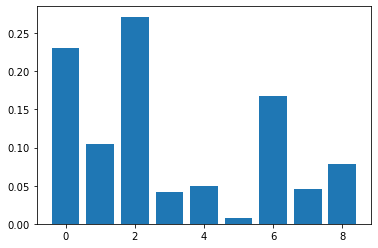

In [20]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [21]:
feature_importances = clf.feature_importances_

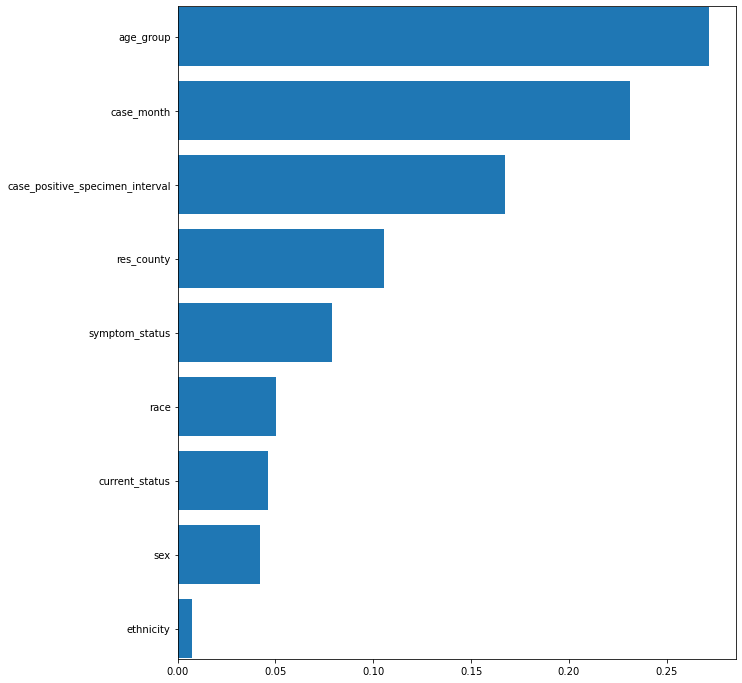

In [22]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,12)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [23]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False,  True, False, False, False,  True, False, False])

In [24]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=19)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\jhsch\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:435: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [25]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1757
           1       0.30      0.03      0.06        88

    accuracy                           0.95      1845
   macro avg       0.63      0.52      0.52      1845
weighted avg       0.92      0.95      0.93      1845

Training Score: 0.9609615037050425
Testing Score: 0.9523035230352304


ExtraTrees Model

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=19, n_estimators=50).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1757
           1       0.33      0.03      0.06        88

    accuracy                           0.95      1845
   macro avg       0.64      0.52      0.52      1845
weighted avg       0.92      0.95      0.93      1845

Training Score: 0.9636725103921923
Testing Score: 0.9506775067750678
